Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
Chi-Square Statistic: 713.1793
p-value: 0.0000


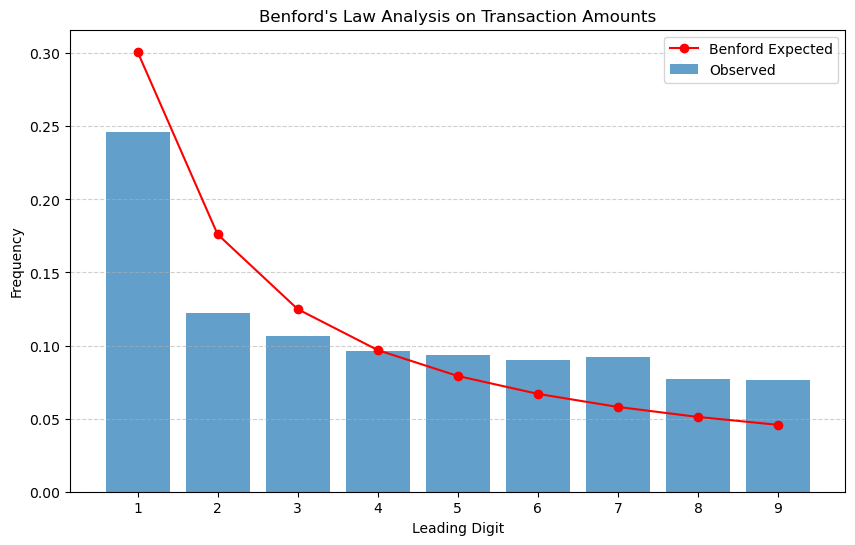

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# 1. Load the dataset
file_path = '2019Data.csv'
df = pd.read_csv(file_path)

# Let's inspect the columns to identify the transaction amount column
print(df.columns)
# 2. Clean the transaction amounts
amounts = pd.to_numeric(df['amt'], errors='coerce')
amounts = amounts[amounts > 0].dropna()

# 3. Extract leading digits
def leading_digit(x):
    x_str = str(x).lstrip('0').replace('.', '')
    return int(x_str[0]) if x_str else np.nan

leading_digits = amounts.apply(leading_digit).dropna().astype(int)

# 4. Observed distribution
observed_counts = leading_digits.value_counts().sort_index()
observed_freq = observed_counts / observed_counts.sum()

# 5. Expected Benford distribution
benford_freq = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
observed_counts_array = np.array([observed_counts.get(d, 0) for d in range(1, 10)])
expected_counts_array = benford_freq * observed_counts_array.sum()

# 6. Chi-square test
chi_stat, p_value = chisquare(f_obs=observed_counts_array, f_exp=expected_counts_array)
print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 7. Visualization
plt.figure(figsize=(10,6))
plt.bar(range(1,10), observed_counts_array/observed_counts_array.sum(), label='Observed', alpha=0.7)
plt.plot(range(1,10), benford_freq, 'ro-', label='Benford Expected')
plt.xticks(range(1,10))
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Benford\'s Law Analysis on Transaction Amounts')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [10]:


# Function to compute leading digit counts and chi-square test
def benford_analysis(sub_df, label):
    amounts = pd.to_numeric(sub_df['amt'], errors='coerce')
    amounts = amounts[amounts > 0].dropna()

    # Extract leading digit
    def leading_digit(x):
        x_str = str(x).lstrip('0').replace('.', '')
        return int(x_str[0]) if x_str else np.nan

    leading_digits = amounts.apply(leading_digit).dropna().astype(int)
    observed_counts = leading_digits.value_counts().sort_index()
    observed_counts_array = np.array([observed_counts.get(d, 0) for d in range(1, 10)])
    benford_freq = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
    expected_counts_array = benford_freq * observed_counts_array.sum()

    chi_stat, p_value = chisquare(f_obs=observed_counts_array, f_exp=expected_counts_array)
    print(f"{label} Transactions -> Chi-Square: {chi_stat:.4f}, p-value: {p_value:.4f}")

    observed_freq = observed_counts_array / observed_counts_array.sum()
    return observed_freq, benford_freq

# Separate Fraud vs Non-Fraud
fraud_df = df[df['is_fraud'] == 1]
nonfraud_df = df[df['is_fraud'] == 0]

# Run analysis
fraud_obs, benford_expected = benford_analysis(fraud_df, "Fraudulent")
nonfraud_obs, _ = benford_analysis(nonfraud_df, "Non-Fraudulent")



Fraudulent Transactions -> Chi-Square: 499.1721, p-value: 0.0000
Non-Fraudulent Transactions -> Chi-Square: 607.2642, p-value: 0.0000


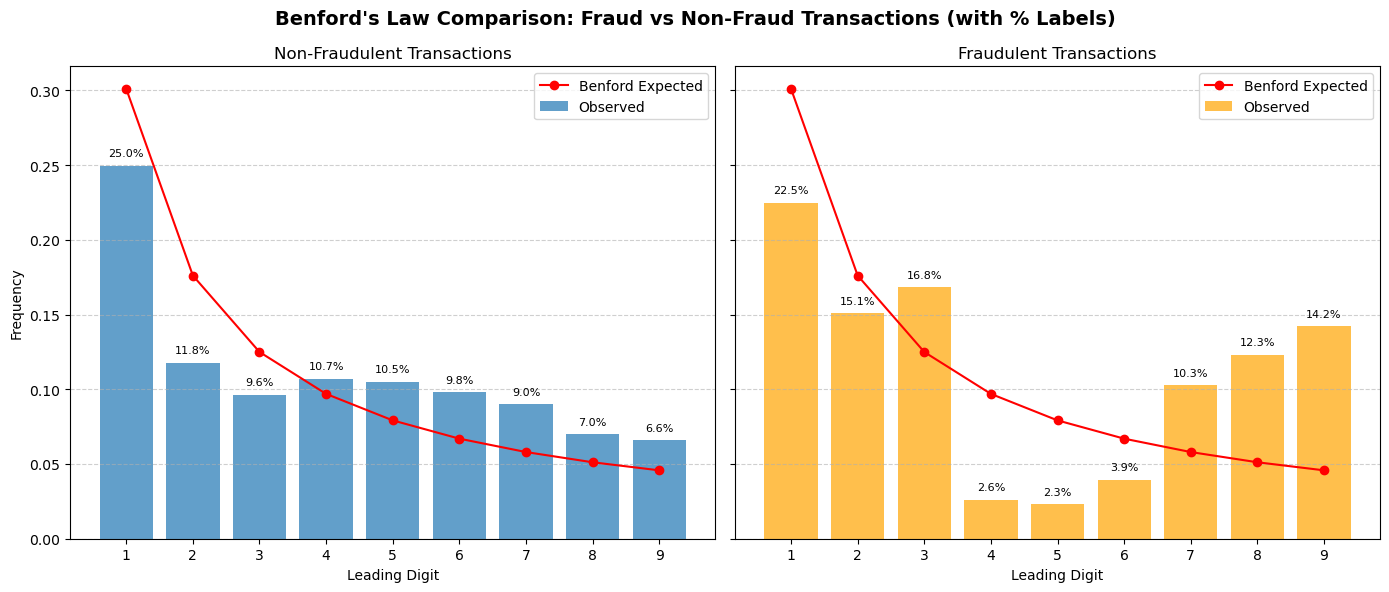

In [11]:
def add_percentage_labels(ax, values):
    for i, val in enumerate(values):
        ax.text(i+1, val + 0.005, f'{val*100:.1f}%', ha='center', va='bottom', fontsize=8)

# Replot with labels
digits = range(1, 10)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Non-Fraudulent Plot
axes[0].bar(digits, nonfraud_obs, label='Observed', alpha=0.7)
axes[0].plot(digits, benford_expected, 'ro-', label='Benford Expected')
add_percentage_labels(axes[0], nonfraud_obs)
axes[0].set_title('Non-Fraudulent Transactions')
axes[0].set_xlabel('Leading Digit')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(digits)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Fraudulent Plot
axes[1].bar(digits, fraud_obs, label='Observed', alpha=0.7, color='orange')
axes[1].plot(digits, benford_expected, 'ro-', label='Benford Expected')
add_percentage_labels(axes[1], fraud_obs)
axes[1].set_title('Fraudulent Transactions')
axes[1].set_xlabel('Leading Digit')
axes[1].set_xticks(digits)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Benford\'s Law Comparison: Fraud vs Non-Fraud Transactions (with % Labels)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
Fraudulent: rows=1041, valid_pos_amt=1041, leading_digits=1041, Chi-Square=499.1721, p-value=0.0000
Non-Fraudulent: rows=6602, valid_pos_amt=6602, leading_digits=6602, Chi-Square=607.2642, p-value=0.0000


<Figure size 1400x600 with 0 Axes>

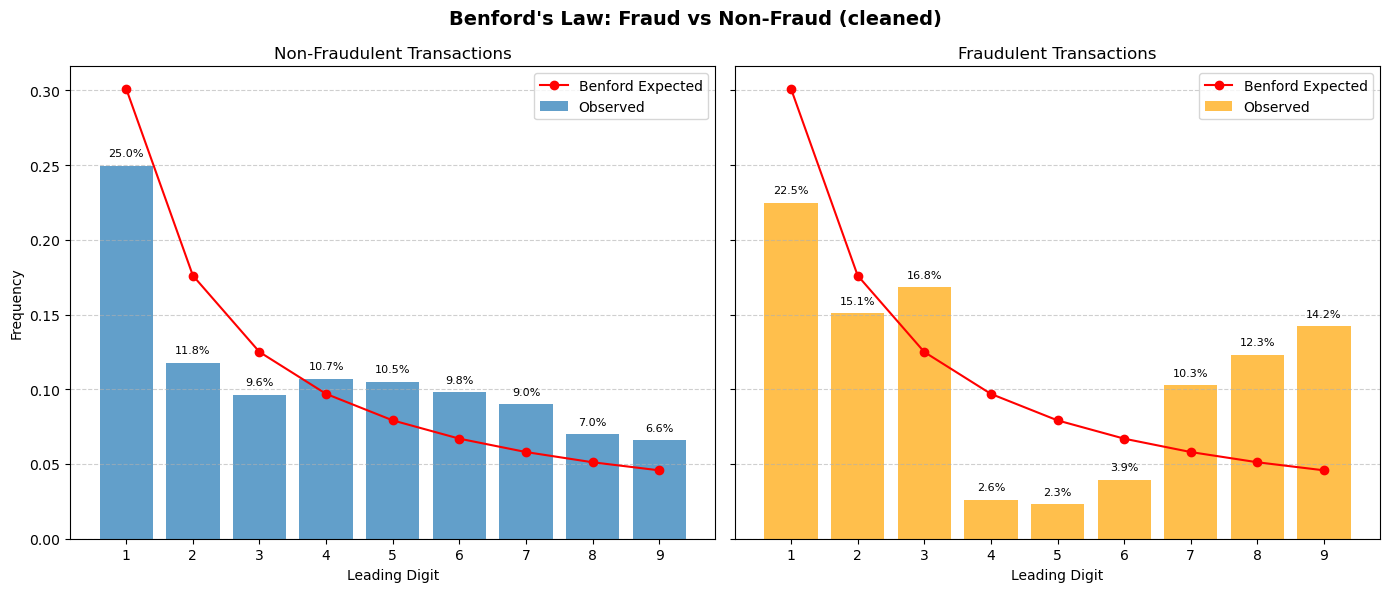

In [16]:
# Load the main fraud dataset
df_main = pd.read_csv('fraud_data.csv')

# See column names to identify the amount column
print(df_main.columns)# Load the main fraud dataset
df_main = pd.read_csv('fraud_data.csv')

# See column names to identify the amount column
print(df_main.columns)# Sanity check
required_cols = {"amt", "is_fraud"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing required column(s): {missing}. Found: {list(df.columns)}")

# ============ 2) Clean 'amt' column ============ #
# Convert to string, strip currency symbols/commas/whitespace
# Handle negatives written like "(123.45)" -> -123.45
amt_str = df["amt"].astype(str).str.strip()

# Detect parentheses negatives
paren_neg = amt_str.str.match(r"^\(.*\)$")
amt_str = amt_str.str.replace(r"^\((.*)\)$", r"-\1", regex=True)

# Remove $ and commas and spaces
amt_str = amt_str.str.replace(r"[\$,]", "", regex=True).str.replace(" ", "")

# Convert to numeric
df["amt_clean"] = pd.to_numeric(amt_str, errors="coerce")

# Keep only positive amounts for Benford
df["amt_pos"] = df["amt_clean"].where(df["amt_clean"] > 0)

# ============ 3) Helper functions ============ #
def leading_digit_series(values: pd.Series) -> pd.Series:
    """Return series of first significant digit (1..9) for positive numbers."""
    # Drop NaN, zeros, negatives (should already be positive)
    s = values.dropna()
    # Convert each number to its leading digit
    def ld(x):
        # Fast path for normal decimals
        x = float(x)
        if x <= 0 or np.isinf(x) or np.isnan(x):
            return np.nan
        # Remove leading zeros by scaling if needed
        while x < 1:
            x *= 10
        # Now x >= 1
        d = int(str(x)[0])
        return d if 1 <= d <= 9 else np.nan
    return s.apply(ld).dropna().astype(int)

BENFORD_FREQ = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
DIGITS = np.arange(1, 10)

def benford_analysis(sub: pd.DataFrame, label: str):
    """Compute observed freq, expected freq, chi-square (safe)."""
    amounts = sub["amt_pos"]
    n_all = len(sub)
    n_valid = amounts.notna().sum()

    if n_valid == 0:
        print(f"{label}: No valid positive amounts -> skipping Benford test.")
        return None

    leading = leading_digit_series(amounts)
    if leading.empty:
        print(f"{label}: No extractable leading digits -> skipping Benford test.")
        return None

    obs_counts = leading.value_counts().reindex(DIGITS, fill_value=0).values
    total = obs_counts.sum()
    if total == 0:
        print(f"{label}: Zero observed counts -> skipping Benford test.")
        return None

    exp_counts = BENFORD_FREQ * total

    # Guard against zero expected cells (shouldn't happen)
    if np.any(exp_counts == 0):
        print(f"{label}: Some expected counts are zero -> cannot run chi-square safely.")
        chi_stat = np.nan
        p_val = np.nan
    else:
        chi_stat, p_val = chisquare(f_obs=obs_counts, f_exp=exp_counts)

    obs_freq = obs_counts / total
    print(
        f"{label}: rows={n_all}, valid_pos_amt={n_valid}, "
        f"leading_digits={total}, Chi-Square={chi_stat:.4f}, p-value={p_val:.4f}"
    )
    return {"obs_freq": obs_freq, "exp_freq": BENFORD_FREQ, "counts": obs_counts}

def add_pct_labels(ax, vals):
    for i, v in enumerate(vals, start=1):
        ax.text(i, v + 0.005, f"{v*100:.1f}%", ha="center", va="bottom", fontsize=8)

# ============ 4) Split & analyze ============ #
fraud_df = df[df["is_fraud"] == 1]
nonfraud_df = df[df["is_fraud"] == 0]

fraud_res = benford_analysis(fraud_df, "Fraudulent")
nonfraud_res = benford_analysis(nonfraud_df, "Non-Fraudulent")

# ============ 5) Plot ============ #
plt.figure(figsize=(14, 6))
if nonfraud_res is not None and fraud_res is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Non-Fraud
    nf_obs = nonfraud_res["obs_freq"]
    axes[0].bar(DIGITS, nf_obs, alpha=0.7, label="Observed")
    axes[0].plot(DIGITS, nonfraud_res["exp_freq"], "ro-", label="Benford Expected")
    add_pct_labels(axes[0], nf_obs)
    axes[0].set_title("Non-Fraudulent Transactions")
    axes[0].set_xlabel("Leading Digit")
    axes[0].set_ylabel("Frequency")
    axes[0].set_xticks(DIGITS)
    axes[0].legend()
    axes[0].grid(axis="y", linestyle="--", alpha=0.6)

    # Fraud
    fr_obs = fraud_res["obs_freq"]
    axes[1].bar(DIGITS, fr_obs, alpha=0.7, color="orange", label="Observed")
    axes[1].plot(DIGITS, fraud_res["exp_freq"], "ro-", label="Benford Expected")
    add_pct_labels(axes[1], fr_obs)
    axes[1].set_title("Fraudulent Transactions")
    axes[1].set_xlabel("Leading Digit")
    axes[1].set_xticks(DIGITS)
    axes[1].legend()
    axes[1].grid(axis="y", linestyle="--", alpha=0.6)

    plt.suptitle("Benford's Law: Fraud vs Non-Fraud (cleaned)", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

elif nonfraud_res is not None:
    plt.bar(DIGITS, nonfraud_res["obs_freq"], alpha=0.7, label="Observed")
    plt.plot(DIGITS, nonfraud_res["exp_freq"], "ro-", label="Benford Expected")
    add_pct_labels(plt.gca(), nonfraud_res["obs_freq"])
    plt.title("Non-Fraudulent Transactions")
    plt.xlabel("Leading Digit")
    plt.ylabel("Frequency")
    plt.xticks(DIGITS)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

elif fraud_res is not None:
    plt.bar(DIGITS, fraud_res["obs_freq"], alpha=0.7, color="orange", label="Observed")
    plt.plot(DIGITS, fraud_res["exp_freq"], "ro-", label="Benford Expected")
    add_pct_labels(plt.gca(), fraud_res["obs_freq"])
    plt.title("Fraudulent Transactions")
    plt.xlabel("Leading Digit")
    plt.ylabel("Frequency")
    plt.xticks(DIGITS)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()
else:
    print("No valid groups to plot (check cleaning and data).")

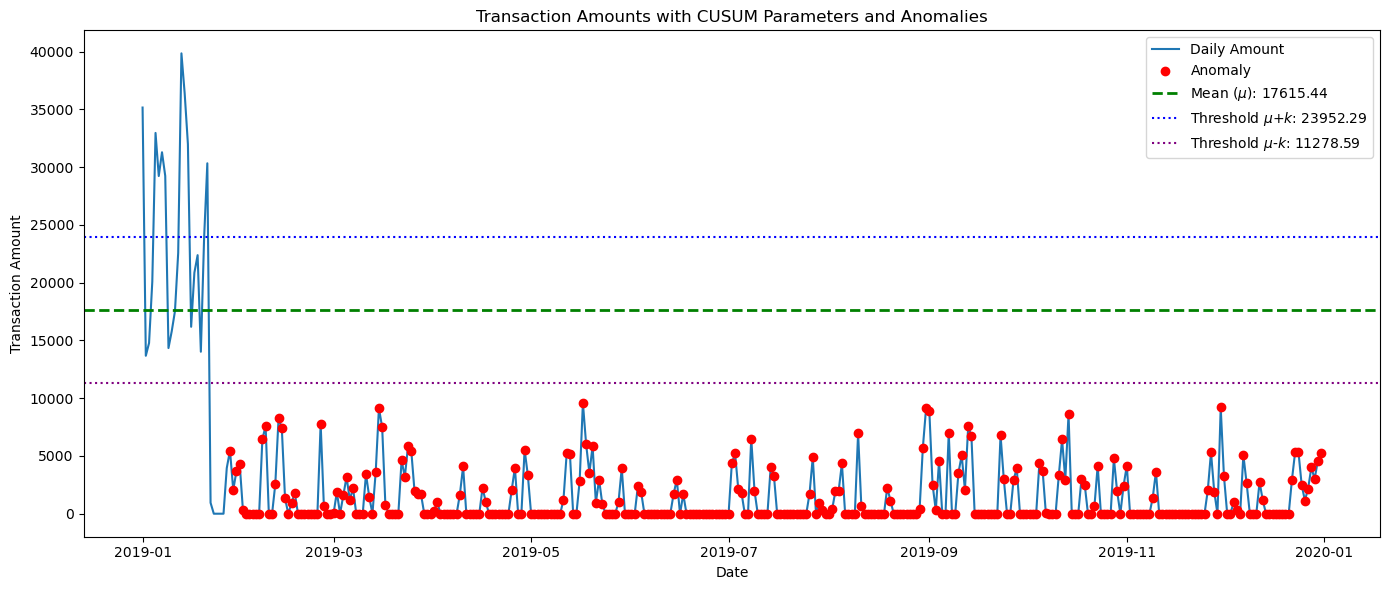

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load transaction data
df = pd.read_csv('2019Data.csv')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.set_index('trans_date_trans_time', inplace=True)
daily = df['amt'].resample('D').sum()

# CUSUM parameters
window = 30
mu = daily[:window].mean()
sigma = daily[:window].std()
k = 0.5 * sigma
H = 5 * sigma

S_pos = [0]
S_neg = [0]
anomalies = []
for x in daily:
    S_pos_new = max(0, S_pos[-1] + x - (mu + k))
    S_neg_new = max(0, S_neg[-1] - x + (mu - k))
    anomalies.append(S_pos_new > H or S_neg_new > H)
    S_pos.append(S_pos_new)
    S_neg.append(S_neg_new)

cusum_df = pd.DataFrame({
    'date': daily.index,
    'amount': daily.values,
    'anomaly': anomalies
})

plt.figure(figsize=(14,6))
plt.plot(cusum_df['date'], cusum_df['amount'], label='Daily Amount')
plt.scatter(cusum_df[cusum_df['anomaly']]['date'], cusum_df[cusum_df['anomaly']]['amount'], color='red', label='Anomaly', zorder=5)
plt.axhline(mu, color='green', linestyle='--', linewidth=2, label=f'Mean ($\\mu$): {mu:.2f}')
plt.axhline(mu+k, color='blue', linestyle=':', label=f'Threshold $\\mu$+$k$: {mu+k:.2f}')
plt.axhline(mu-k, color='purple', linestyle=':', label=f'Threshold $\\mu$-$k$: {mu-k:.2f}')
plt.title('Transaction Amounts with CUSUM Parameters and Anomalies')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv("2019Data.csv")

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df = df.sort_values('trans_date_trans_time')

# Extract customer ID from transaction number
df['customer_id'] = df['trans_num'].str.split('-').str[0]

# Merchant ID is simply the merchant name
df['merchant_id'] = df['merchant']


In [4]:
import networkx as nx

G = nx.DiGraph()

# Add nodes
G.add_nodes_from(df['customer_id'].unique(), type="customer")
G.add_nodes_from(df['merchant_id'].unique(), type="merchant")

# Add weighted edges
for _, row in df.iterrows():
    G.add_edge(row['customer_id'], row['merchant_id'], weight=row['amt'])


In [5]:
# Centrality Measures
deg_cust  = nx.out_degree_centrality(G)
deg_merch = nx.in_degree_centrality(G)

pagerank = nx.pagerank(G, alpha=0.85)

# Map Features Back
df['customer_degree']  = df['customer_id'].map(deg_cust)
df['merchant_degree']  = df['merchant_id'].map(deg_merch)
df['pagerank']         = df['merchant_id'].map(pagerank)


In [6]:
from networkx.algorithms.triads import triadic_census

triads = triadic_census(G)

# Normalize as a graph anomaly score:
motif_score = (triads['120C'] + triads['210'] + triads['300']) / sum(triads.values())

df['motif_score'] = motif_score


In [7]:
df['network_fraud_score'] = (
    0.40*df['customer_degree'] +
    0.40*df['merchant_degree'] +
    0.10*df['pagerank'] +
    0.10*df['motif_score']
)

# Normalize 0-1
df['network_fraud_score'] = (df['network_fraud_score'] - df['network_fraud_score'].min()) / \
                            (df['network_fraud_score'].max() - df['network_fraud_score'].min())


In [8]:
K = 500

df_sorted = df.sort_values('network_fraud_score', ascending=False)
top_k = df_sorted.head(K)

top_k[['trans_num','customer_id','merchant','amt','network_fraud_score','is_fraud']]


,trans_num,customer_id,merchant,amt,network_fraud_score,is_fraud
6710,134651ebb654e93ab2101d7b91f14fdd,134651ebb654e93ab2101d7b91f14fdd,Kilback LLC,66.37,1.0,0
6134,c7797877d372395d8828f60b498117c9,c7797877d372395d8828f60b498117c9,Kilback LLC,107.48,1.0,0
6926,3446f287207d1bb1a4c5dac53b71775c,3446f287207d1bb1a4c5dac53b71775c,Kilback LLC,132.88,1.0,0
7445,3e0f99ec3f3da60eeac08f5a5bd9e318,3e0f99ec3f3da60eeac08f5a5bd9e318,Kilback LLC,191.40,1.0,0
612,7edf0514860a51158e4546ed6b97e729,7edf0514860a51158e4546ed6b97e729,Kilback LLC,311.63,1.0,1
...,...,...,...,...,...,...
7458,9a40be6807dc4f99d1752af670cc4ba1,9a40be6807dc4f99d1752af670cc4ba1,Connelly-Carte,62.78,0.7,0
289,697410b832d62712dfdf5ec7e613ca2d,697410b832d62712dfdf5ec7e613ca2d,Prohaska-Murray,9.86,0.7,1
2974,1e9e0903e6b427fa0cec593c1c6b8153,1e9e0903e6b427fa0cec593c1c6b8153,Torp-Labadie,42.66,0.7,0
7172,c964bd44c1834f5f69b723bff25b22ca,c964bd44c1834f5f69b723bff25b22ca,Connelly-Carte,77.51,0.7,0


In [10]:
threshold = df['network_fraud_score'].quantile(0.98)

df['predicted_fraud'] = (df['network_fraud_score'] >= threshold).astype(int)


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(df['is_fraud'], df['predicted_fraud'])
report = classification_report(df['is_fraud'], df['predicted_fraud'])

print("CONFUSION MATRIX:\n", cm)
print("\nCLASSIFICATION REPORT:\n", report)


CONFUSION MATRIX:
 [[6479  123]
 [ 999   42]]

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6602
           1       0.25      0.04      0.07      1041

    accuracy                           0.85      7643
   macro avg       0.56      0.51      0.49      7643
weighted avg       0.78      0.85      0.80      7643



In [12]:
fraud_df = df[df['predicted_fraud']==1]

print("Total predicted fraud:", len(fraud_df))
print("Total actual fraud:", df['is_fraud'].sum())
print("Detected:", fraud_df['is_fraud'].sum())

fraud_df[['trans_num','customer_id','merchant','amt','network_fraud_score','is_fraud']]


Total predicted fraud: 165
Total actual fraud: 1041
Detected: 42


,trans_num,customer_id,merchant,amt,network_fraud_score,is_fraud
1038,b2820a9708d41515e2a1590d3cce80d4,b2820a9708d41515e2a1590d3cce80d4,Kilback LLC,68.96,1.000000,0
1041,b48cee6edd7f798cb5d4080b82e4a1fe,b48cee6edd7f798cb5d4080b82e4a1fe,Hudson-Ratke,122.86,0.833333,0
1053,f5afac4b2726300db61d131c65db187d,f5afac4b2726300db61d131c65db187d,McDermott-Weimann,236.18,0.833333,0
1057,d01846bf25a4eedf3366527b3b79b4ff,d01846bf25a4eedf3366527b3b79b4ff,"""Reichert, Shanahan and Hayes""",78.56,0.833333,0
1072,a5c13edd756f36c026630d13672974bd,a5c13edd756f36c026630d13672974bd,Hudson-Ratke,199.55,0.833333,0
...,...,...,...,...,...,...
812,be62e445a46253241f6bf009baf338cd,be62e445a46253241f6bf009baf338cd,Cormier LLC,944.06,0.900000,1
826,69338ec68375e1ee5a0b04518e15937b,69338ec68375e1ee5a0b04518e15937b,McDermott-Weimann,347.84,0.833333,1
884,0e7238076a86e8cdd01e04d30aef306a,0e7238076a86e8cdd01e04d30aef306a,Kilback LLC,113.81,1.000000,1
893,ab8ffe8179e57ee1624355ffc7bebfc2,ab8ffe8179e57ee1624355ffc7bebfc2,Kilback LLC,338.03,1.000000,1


Top-K suspicious transactions (preview):
                            trans_num                       customer_id  \
175  24280e9bda7ebd633a90863516978f55  24280e9bda7ebd633a90863516978f55   
544  9ff6f78045ec88d3b6cea8162704059f  9ff6f78045ec88d3b6cea8162704059f   
752  7bae6221016e6407fe2dc545d821583b  7bae6221016e6407fe2dc545d821583b   
380  d3e86eed6a567944ed46ff059f21edd5  d3e86eed6a567944ed46ff059f21edd5   
330  75ff9059f57e5f138b66c18a364f452b  75ff9059f57e5f138b66c18a364f452b   
271  f45cab295e76e954df04e61e33a92643  f45cab295e76e954df04e61e33a92643   
893  ab8ffe8179e57ee1624355ffc7bebfc2  ab8ffe8179e57ee1624355ffc7bebfc2   
805  b32209e2ee188f79d70e01e0af8871d1  b32209e2ee188f79d70e01e0af8871d1   
182  cc9823ce4c9002170636cee186783c90  cc9823ce4c9002170636cee186783c90   
612  7edf0514860a51158e4546ed6b97e729  7edf0514860a51158e4546ed6b97e729   
812  be62e445a46253241f6bf009baf338cd  be62e445a46253241f6bf009baf338cd   
146  25a37b97afb72231c2b09db3e5f58fed  25a37b97afb72231c2b0

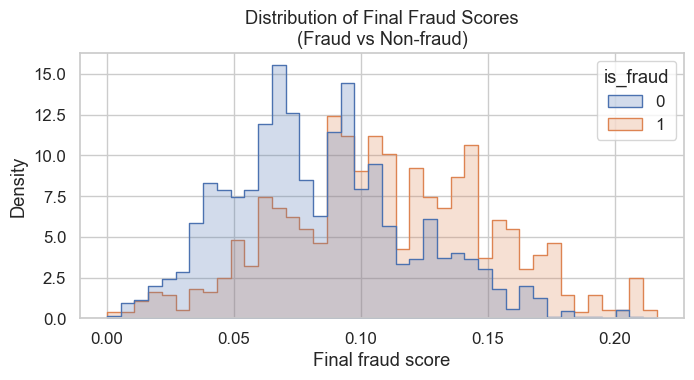

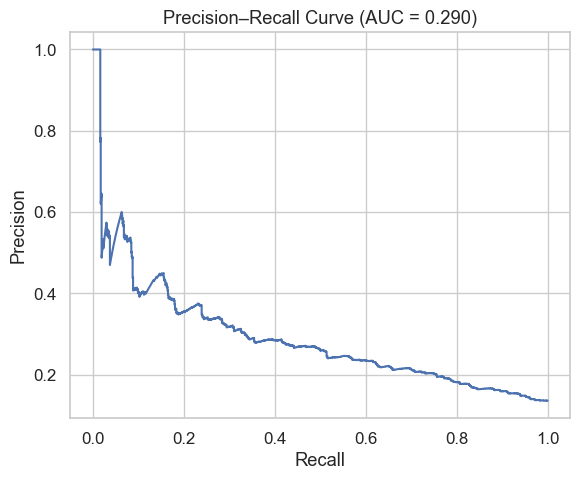

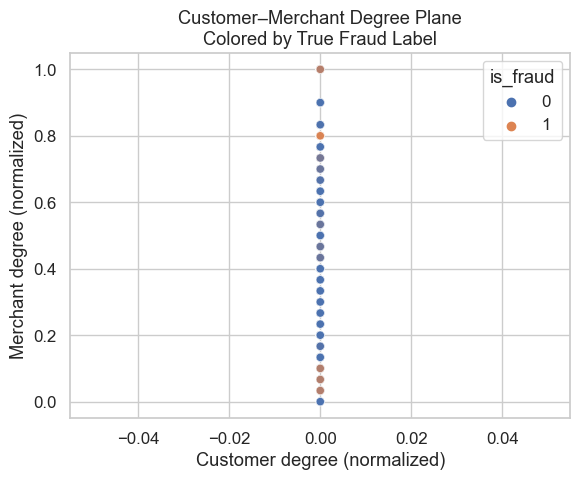

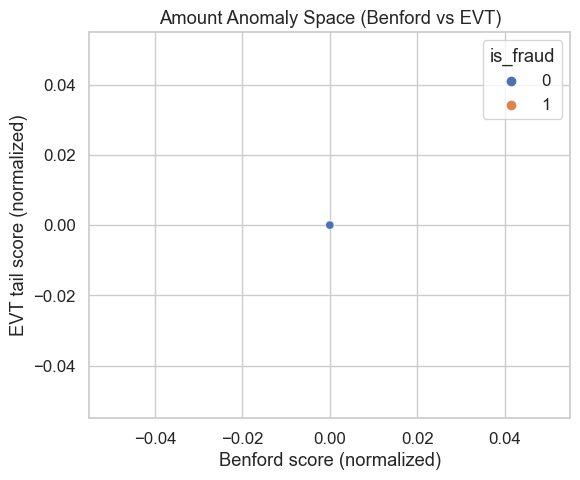

C:\Users\User\AppData\Local\Temp\ipykernel_9468\3692991440.py:267: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\notebooks\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


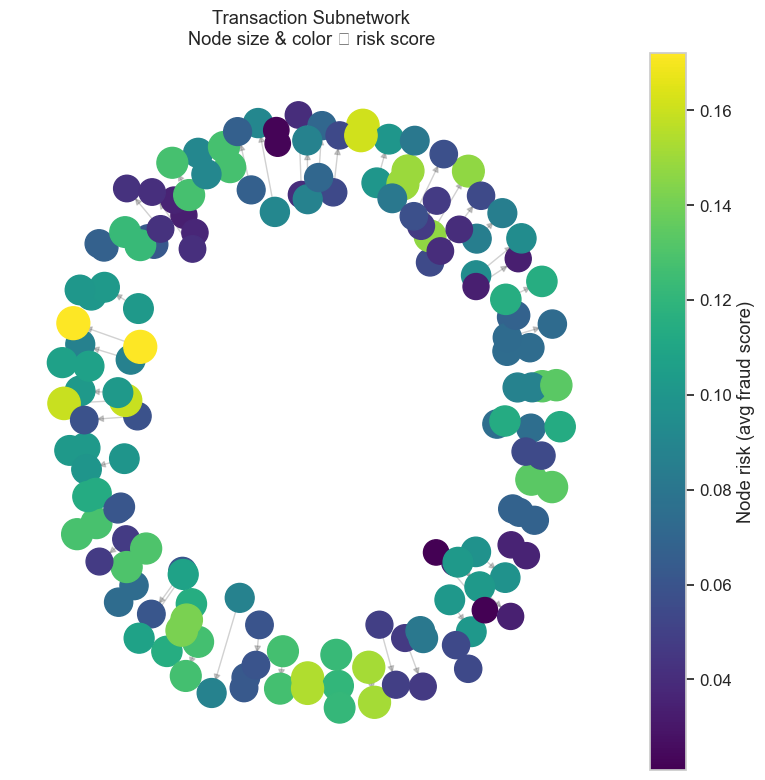

In [13]:
# ===========================
# 0. IMPORTS & STYLE
# ===========================
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import genpareto
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report

sns.set_theme(style="whitegrid", font_scale=1.1)

# ===========================
# 1. LOAD & BASIC PREPROCESSING
# ===========================
# Adjust file name/path as needed
df = pd.read_csv("2019Data.csv")

# Ensure expected columns exist
expected_cols = [
    'trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
    'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
    'merch_long', 'is_fraud'
]
missing = set(expected_cols) - set(df.columns)
if missing:
    raise ValueError(f"Missing columns in CSV: {missing}")

# Time and IDs
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df = df.sort_values('trans_date_trans_time')

# Customer ID from transaction number (e.g., C12345-XXXX)
df['customer_id'] = df['trans_num'].str.split('-').str[0]
df['merchant_id'] = df['merchant']

# ===========================
# 2. SIMPLE NUMERICAL FRAUD FEATURES
#    (Benford + EVT; lightweight versions)
# ===========================

# ---- 2.1 Benford leading-digit deviation per customer ----
def benford_expected():
    digits = np.arange(1, 10)
    return np.log10(1 + 1/digits)

expected_benford = benford_expected()

def benford_score_for_group(leading_digits):
    if len(leading_digits) < 5:
        return 0.0
    observed, _ = np.histogram(leading_digits, bins=np.arange(1, 11), density=True)
    score = np.sum((observed - expected_benford)**2 / expected_benford)
    return score

# extract leading digit of amount (ignore decimals and leading zeros)
ld = (df['amt']
      .astype(str)
      .str.replace('.', '', regex=False)
      .str.lstrip('0')
      .str[0]
     )
df['leading_digit'] = ld.fillna('0').replace('', '0').astype(int)

df['benford_score'] = df.groupby('customer_id')['leading_digit']\
                        .transform(benford_score_for_group)

# ---- 2.2 EVT tail score per customer (very simple tail prob) ----
def evt_tail_score(amounts, upper_percentile=95):
    if len(amounts) < 20:
        return pd.Series(0.0, index=amounts.index)
    threshold = np.percentile(amounts, upper_percentile)
    tail = amounts[amounts > threshold] - threshold
    if len(tail) < 5:
        return pd.Series(0.0, index=amounts.index)
    c, loc, scale = genpareto.fit(tail)
    # Tail probability (bigger = more extreme)
    probs = 1 - genpareto.cdf(tail, c, loc=0, scale=scale)
    score = pd.Series(0.0, index=amounts.index)
    score.loc[tail.index] = probs
    return score

df['evt_score'] = df.groupby('customer_id')['amt'].apply(evt_tail_score)\
                    .reset_index(level=0, drop=True)

# ===========================
# 3. BUILD TRANSACTION NETWORK
# ===========================
G = nx.DiGraph()

# Add nodes with type
G.add_nodes_from(df['customer_id'].unique(), kind='customer')
G.add_nodes_from(df['merchant_id'].unique(), kind='merchant')

# Add edges with weight (amount) and label for fraud
for _, row in df.iterrows():
    G.add_edge(row['customer_id'],
               row['merchant_id'],
               weight=row['amt'],
               is_fraud=row['is_fraud'])

# ===========================
# 4. NETWORK FEATURES (CENTRALITY, etc.)
# ===========================
# Degree centrality
deg_out = nx.out_degree_centrality(G)   # customers
deg_in = nx.in_degree_centrality(G)     # merchants

# Weighted degree (strength)
w_out = dict(G.out_degree(weight='weight'))
w_in = dict(G.in_degree(weight='weight'))

# PageRank (probability mass tends to suspicious hubs)
pagerank = nx.pagerank(G, alpha=0.85, weight='weight')

# Map back to transactions
df['cust_deg']  = df['customer_id'].map(deg_out)
df['merch_deg'] = df['merchant_id'].map(deg_in)
df['cust_wdeg'] = df['customer_id'].map(w_out)
df['merch_wdeg']= df['merchant_id'].map(w_in)
df['pagerank']  = df['merchant_id'].map(pagerank)

# Handle any NaNs (e.g., isolated nodes) by zero-fill
for col in ['cust_deg','merch_deg','cust_wdeg','merch_wdeg','pagerank']:
    df[col] = df[col].fillna(0.0)

# ===========================
# 5. NETWORK FRAUD SCORE + FUSION
# ===========================
# Normalize helper
def normalize(col):
    c = df[col]
    rng = c.max() - c.min()
    if rng == 0:
        return pd.Series(0.0, index=c.index)
    return (c - c.min()) / rng

# Normalize all component scores
for comp in ['cust_deg','merch_deg','cust_wdeg','merch_wdeg','pagerank',
             'benford_score','evt_score']:
    df[comp + '_n'] = normalize(comp)

# Fusion: change weights as you like (they sum to 1)
df['network_score'] = (
    0.25*df['cust_deg_n'] +
    0.25*df['merch_deg_n'] +
    0.25*df['cust_wdeg_n'] +
    0.25*df['pagerank_n']
)

df['final_fraud_score'] = (
    0.4*df['network_score'] +
    0.3*df['benford_score_n'] +
    0.3*df['evt_score_n']
)

# ===========================
# 6. OPTIMIZATION: PICK TOP-K SUSPICIOUS TRANSACTIONS
# ===========================
K = 500   # investigation budget (adjust)

df_sorted = df.sort_values('final_fraud_score', ascending=False)
topK = df_sorted.head(K)

print("Top-K suspicious transactions (preview):")
print(topK[['trans_num','customer_id','merchant','amt',
            'final_fraud_score','is_fraud']].head(15))

# Threshold-based binary decision (e.g., top 2% as fraud)
threshold = df['final_fraud_score'].quantile(0.98)
df['predicted_fraud'] = (df['final_fraud_score'] >= threshold).astype(int)

# ===========================
# 7. EVALUATION: CONFUSION MATRIX & PR CURVE
# ===========================
y_true = df['is_fraud'].values
y_score = df['final_fraud_score'].values
y_pred = df['predicted_fraud'].values

cm = confusion_matrix(y_true, y_pred)
print("\nCONFUSION MATRIX:\n", cm)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_true, y_pred))

prec, rec, thr = precision_recall_curve(y_true, y_score)
pr_auc = auc(rec, prec)
print(f"Precision-Recall AUC = {pr_auc:.4f}")

# ===========================
# 8. PUBLICATION-GRADE PLOTS
# ===========================

# ---- 8.1 Distribution of final fraud scores ----
plt.figure(figsize=(7,4))
sns.histplot(df, x='final_fraud_score', hue='is_fraud',
             bins=40, element='step', stat='density', common_norm=False)
plt.title("Distribution of Final Fraud Scores\n(Fraud vs Non-fraud)")
plt.xlabel("Final fraud score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# ---- 8.2 Precision–Recall curve ----
plt.figure(figsize=(6,5))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AUC = {pr_auc:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- 8.3 Customer vs Merchant degree, colored by fraud ----
plt.figure(figsize=(6,5))
sample = df.sample(min(len(df), 5000), random_state=0)
sns.scatterplot(data=sample,
                x='cust_deg_n', y='merch_deg_n',
                hue='is_fraud', alpha=0.7)
plt.xlabel("Customer degree (normalized)")
plt.ylabel("Merchant degree (normalized)")
plt.title("Customer–Merchant Degree Plane\nColored by True Fraud Label")
plt.tight_layout()
plt.show()

# ---- 8.4 Benford vs EVT score plane ----
plt.figure(figsize=(6,5))
sns.scatterplot(data=sample,
                x='benford_score_n', y='evt_score_n',
                hue='is_fraud', alpha=0.7)
plt.xlabel("Benford score (normalized)")
plt.ylabel("EVT tail score (normalized)")
plt.title("Amount Anomaly Space (Benford vs EVT)")
plt.tight_layout()
plt.show()

# ---- 8.5 Network visualization (sampled, sized & colored by fraud score) ----
# To keep it readable, use a smaller subgraph:
sub_cust = sample['customer_id'].unique()[:80]
sub_df = df[df['customer_id'].isin(sub_cust)].copy()
sub_merch = sub_df['merchant_id'].unique()
nodes = list(sub_cust) + list(sub_merch)
H = G.subgraph(nodes).copy()

# Node attributes: risk = average final_fraud_score of transactions touching node
node_risk = {}
for n in H.nodes():
    idx = (sub_df['customer_id'].eq(n)) | (sub_df['merchant_id'].eq(n))
    if idx.any():
        node_risk[n] = sub_df.loc[idx, 'final_fraud_score'].mean()
    else:
        node_risk[n] = 0.0

# Position & sizes
pos = nx.spring_layout(H, k=0.8/np.sqrt(len(H)))
sizes = [300 + 1500*node_risk[n] for n in H.nodes()]

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(H, pos, alpha=0.2)
nodes_plot = nx.draw_networkx_nodes(H, pos,
                                    node_size=sizes,
                                    node_color=[node_risk[n] for n in H.nodes()],
                                    cmap=plt.cm.viridis)
plt.colorbar(nodes_plot, label="Node risk (avg fraud score)")
plt.axis('off')
plt.title("Transaction Subnetwork\nNode size & color ∝ risk score")
plt.tight_layout()
plt.show()
